# Titanic Survival Predictions

This notebook use a simple neural network to predict survival.
If encounter any errors it is advised to restart the kernal and try again.

In [1]:
#Imports 
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Train Model Imports
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

combined_data = pd.concat([train, test], sort=False)
# print(combined_data.shape, combined_data.isna().sum(), test.isna().sum()) 
## Missing values in Age, Cabin, Fare, Embarked

## Clean data

In [3]:
# Copy the train data 
data = train.iloc[:891]

Age is a continuous numerical data, so it's missing value is filled with mean score
Embarked is a categorical data, so missing values are replaced with mode

For Fare - use IterativeImputer to fill missing numerical value considering with all the features

New Features are created using sibling spours parent children

FamilySized are further divided into bins with solo, small, medium, large

In [4]:
## Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

imp = IterativeImputer(max_iter=10, random_state=0)
data['Fare'] = imp.fit_transform(data[['Fare']])

## Add New Features
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1 
data['isAlone'] = data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
data['FamilyBins'] = pd.cut(data['FamilySize'], bins=[0, 1, 4, 7, 11], labels=['Solo', 'Small', 'Medium', 'Large'])

# Drop columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','FamilySize' ,'Parch'], axis=1)

# print(data.head())
print(data.isna().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
isAlone       0
FamilyBins    0
dtype: int64


### Preprocess data

This session focus on processing data

- Standardization: Makes features comparable by putting them on the same scale
- Label Encoding: Converts categorical text data to numbers
- One-Hot Encoding: Creates binary columns for categorical variables, which is often better for machine learning models than simple numeric encoding
- Visualization: Shows correlations between features in the processed dataset

   Survived  Sex       Age      Fare  isAlone  Pclass_0  Pclass_1  Pclass_2  \
0         0    1 -0.592481 -0.502445        0       0.0       0.0       1.0   
1         1    0  0.638789  0.786845        0       1.0       0.0       0.0   
2         1    0 -0.284663 -0.488854        1       0.0       0.0       1.0   
3         1    0  0.407926  0.420730        0       1.0       0.0       0.0   
4         0    1  0.407926 -0.486337        1       0.0       0.0       1.0   

   FamilyBins_0  FamilyBins_1  FamilyBins_2  FamilyBins_3  Embarked_0  \
0           0.0           0.0           1.0           0.0         0.0   
1           0.0           0.0           1.0           0.0         1.0   
2           0.0           0.0           0.0           1.0         0.0   
3           0.0           0.0           1.0           0.0         0.0   
4           0.0           0.0           0.0           1.0         0.0   

   Embarked_1  Embarked_2  
0         0.0         1.0  
1         0.0         0.0  
2 

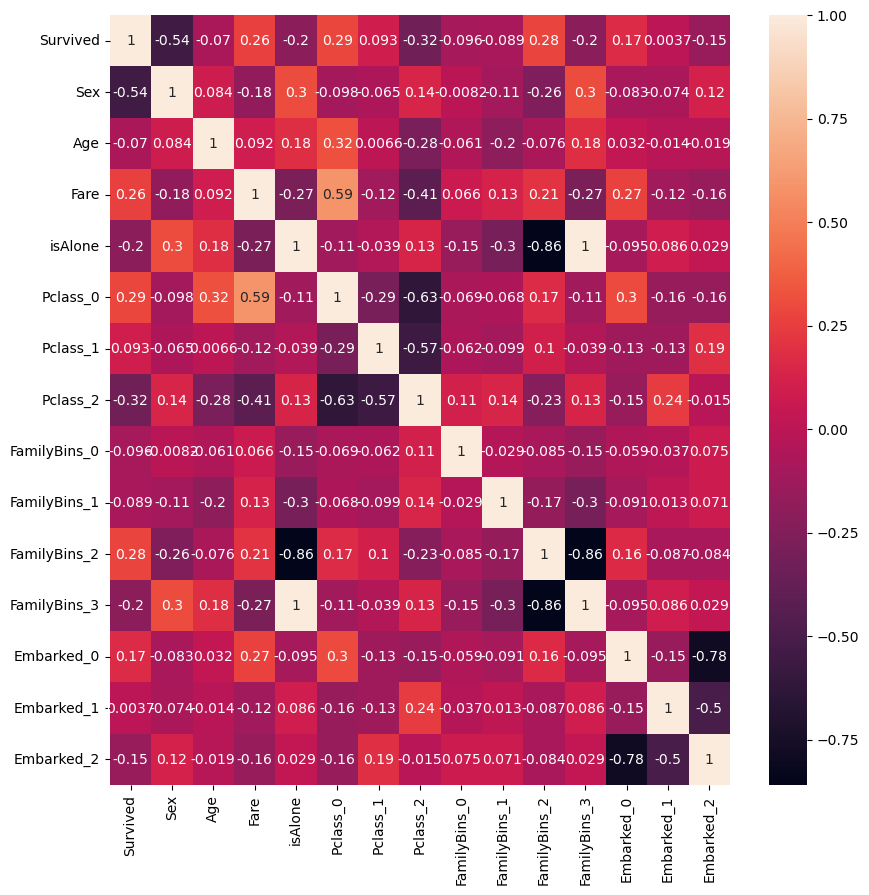

In [5]:
# Standardize Age and Fare
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age','Fare']])

#Label Encode Categorical Data
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

## One Hot Encode Pclass and FamilyBins into 1 and 0
ohe = OneHotEncoder()
pclass = pd.DataFrame(ohe.fit_transform(data[['Pclass']]).toarray()).add_prefix('Pclass_')
familybins = pd.DataFrame(ohe.fit_transform(data[['FamilyBins']]).toarray()).add_prefix('FamilyBins_')
embarked = pd.DataFrame(ohe.fit_transform(data[['Embarked']]).toarray()).add_prefix('Embarked_')
data = pd.concat([data, pclass, familybins, embarked], axis=1)

data = data.drop(['Pclass', 'FamilyBins', 'Embarked'], axis=1)

import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

print(data.head())

### Ai Model

### Model Architecture Summary

1. Input Layer:
   * 32 neurons
   * Takes in features from X_train
   * ReLU activation for non-linearity

2. First Hidden Layer:
   * 16 neurons
   * ReLU activation
   * Preceded by 10% dropout

3. Output Layer:
   * Single neuron
   * Sigmoid activation for binary classification (0 or 1)
   * Preceded by 10% dropout

### Key Features
* Uses dropout (0.1 = 10%) to prevent overfitting
* ReLU activation in hidden layers for better gradient flow
* Sigmoid in output layer for binary classification
* Adam optimizer for efficient training
* Binary crossentropy loss function suitable for binary classification
* Tracks accuracy as a metric during training

Epoch 1/100


/opt/anaconda3/envs/se411/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6074 - loss: 0.6916 - val_accuracy: 0.6145 - val_loss: 0.6837
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6234 - loss: 0.6780 - val_accuracy: 0.6872 - val_loss: 0.6420
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.6915 - loss: 0.6265 - val_accuracy: 0.7598 - val_loss: 0.5604
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.7583 - loss: 0.5638 - val_accuracy: 0.8045 - val_loss: 0.4972
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.7704 - loss: 0.5145 - val_accuracy: 0.8212 - val_loss: 0.4536
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8166 - loss: 0.4754 - val_accuracy: 0.8212 - val_loss: 0.4342
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8290 - loss: 0.4522 - val_accuracy: 0.8212 - val_loss: 0.4157
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8192 - loss: 0.4569 - val_accuracy: 0.8380 - v

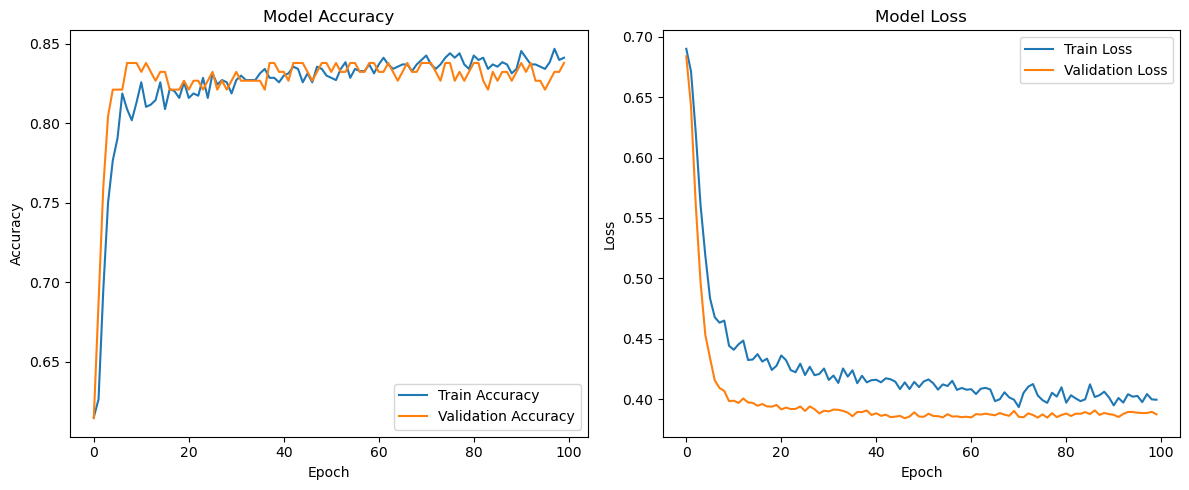

In [6]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def build_model_A():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation='relu', kernel_initializer='uniform'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model and save the training history
model_A = build_model_A()
history = model_A.fit(X_train, y_train, epochs=100, batch_size=25, validation_data=(X_test, y_test))

y_pred = model_A.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print("Accuracy:" + accuracy_score(y_test, y_pred))

### Plot the learning curves

In [ ]:
def plot_learning_curves(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

## Test The Model

Test using the trained model and save the result in the csv file under data

In [7]:
test = test.iloc[:418]

In [8]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

imp = IterativeImputer(max_iter=10, random_state=0)
test['Fare'] = imp.fit_transform(test[['Fare']])

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 
test['isAlone'] = test['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
test['FamilyBins'] = pd.cut(test['FamilySize'], bins=[0, 1, 4, 7, 11], labels=['Solo', 'Small', 'Medium', 'Large'])
print(test.isna().sum())

# Drop columns
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'FamilySize', 'SibSp', 'Parch'], axis=1)
print(test.head())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
isAlone          0
FamilyBins       0
dtype: int64
   Pclass     Sex   Age     Fare Embarked  isAlone FamilyBins
0       3    male  34.5   7.8292        Q        1       Solo
1       3  female  47.0   7.0000        S        0      Small
2       2    male  62.0   9.6875        Q        1       Solo
3       3    male  27.0   8.6625        S        1       Solo
4       3  female  22.0  12.2875        S        0      Small


In [9]:
scaler = StandardScaler()
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])

#Label Encode Categorical test
le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked'] = le.fit_transform(test['Embarked'])

## One Hot Encode Pclass and FamilyBins

ohe = OneHotEncoder()
pclass = pd.DataFrame(ohe.fit_transform(test[['Pclass']]).toarray()).add_prefix('Pclass_')
familybins = pd.DataFrame(ohe.fit_transform(test[['FamilyBins']]).toarray()).add_prefix('FamilyBins_')
embarked = pd.DataFrame(ohe.fit_transform(test[['Embarked']]).toarray()).add_prefix('Embarked_')
test = pd.concat([test, pclass, familybins, embarked], axis=1)

test = test.drop(['Pclass', 'FamilyBins', 'Embarked'], axis=1)
print(data.head())

   Survived  Sex       Age      Fare  isAlone  Pclass_0  Pclass_1  Pclass_2  \
0         0    1 -0.592481 -0.502445        0       0.0       0.0       1.0   
1         1    0  0.638789  0.786845        0       1.0       0.0       0.0   
2         1    0 -0.284663 -0.488854        1       0.0       0.0       1.0   
3         1    0  0.407926  0.420730        0       1.0       0.0       0.0   
4         0    1  0.407926 -0.486337        1       0.0       0.0       1.0   

   FamilyBins_0  FamilyBins_1  FamilyBins_2  FamilyBins_3  Embarked_0  \
0           0.0           0.0           1.0           0.0         0.0   
1           0.0           0.0           1.0           0.0         1.0   
2           0.0           0.0           0.0           1.0         0.0   
3           0.0           0.0           1.0           0.0         0.0   
4           0.0           0.0           0.0           1.0         0.0   

   Embarked_1  Embarked_2  
0         0.0         1.0  
1         0.0         0.0  
2 

In [10]:
y_pred = model_A.predict(test)
y_pred = (y_pred > 0.5).astype(int)
## Save the predictions to a CSV file
submission = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': y_pred.flatten()})
submission.to_csv('data/submission.csv', index=False)
print(submission.shape)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
(418, 2)
